In [2]:
import pandas as pd

df = pd.read_csv("../data/house_prices.csv")
df.head()

,area,bedrooms,bathrooms,price
0,800,1,1,3000000
1,1000,2,1,4000000
2,1200,2,2,5000000
3,1500,3,2,6500000
4,1800,3,3,8000000


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       6 non-null      int64
 1   bedrooms   6 non-null      int64
 2   bathrooms  6 non-null      int64
 3   price      6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


area         0
bedrooms     0
bathrooms    0
price        0
dtype: int64

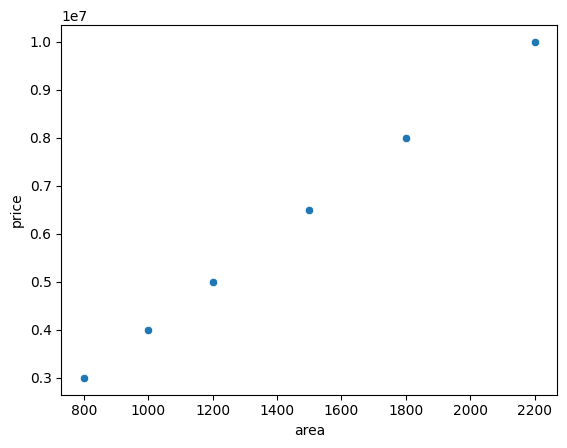

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="area", y="price", data=df)
plt.show()


In [5]:
X = df[["area", "bedrooms", "bathrooms"]]
y = df["price"]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rf_model.predict(X_test)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 2160000.0
R2 Score: -18.6624


In [9]:
import pickle

with open("../model/model.pkl", "wb") as f:
   pickle.dump(rf_model, f)
